In [89]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams.update({'font.size': 14})

In [79]:
dirpath = os.getcwd()
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"
plot_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),r"adsa\examples")

# conductivity

PearsonRResult(statistic=0.07614839857988287, pvalue=0.42699422296147904)


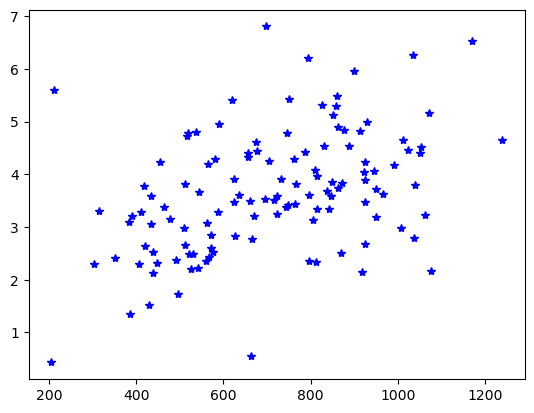

In [60]:
fdf = pd.read_csv(os.path.join(data_path, 'mcond_integrated.csv'))
ddf = pd.read_csv(features_path)

merged = ddf.merge(fdf, on = "cow", how= "left")
v = "lb_vol"
u = "conductivity_lf_7d"
selected = merged[[v, u ]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(x,y, "*b")
print(res)

# Yield

PearsonRResult(statistic=0.5965378188173784, pvalue=8.669779727818297e-14)


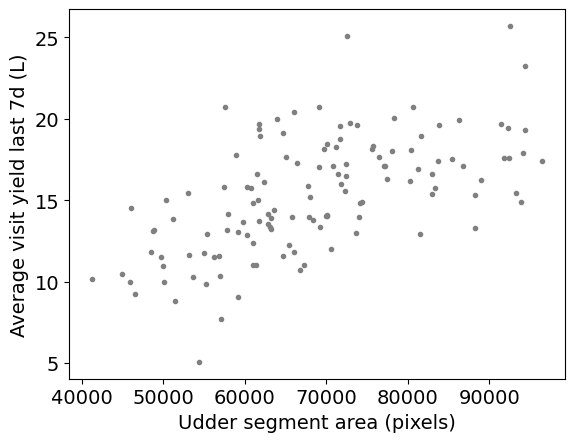

In [88]:
fdf = pd.read_csv(os.path.join(data_path, 'myield_integrated.csv'))
ddf = pd.read_csv(features_path)
merged = ddf.merge(fdf, on = "cow", how= "left")

v = "udder_area"
u = "vyield_udder_7d"
selected = merged[[v, u]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(selected[v], selected[u], ".", color = "gray")

plt.ylabel("Average visit yield last 7d (L)")
plt.savefig(os.path.join(plot_dir, v+"_vs_"+ u+".png"))
print(res)

PearsonRResult(statistic=0.2738531663920896, pvalue=0.001999458081234305)


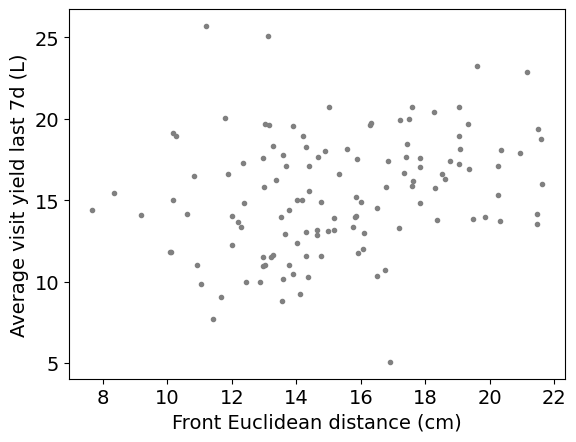

In [161]:
ddf = pd.read_csv(features_path)
merged = ddf.merge(fdf, on = "cow", how= "left")

v = "front_eu"
u = "vyield_udder_7d"
selected = merged[[v, u]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(selected[v], selected[u], ".", color = "gray")
plt.xlabel("Front Euclidean distance (cm)")
plt.ylabel("Average visit yield last 7d (L)")
plt.savefig(os.path.join(plot_dir, v+"_vs_"+ u+".png"))
print(res)

PearsonRResult(statistic=0.33860638369016294, pvalue=0.0001654417184614044)


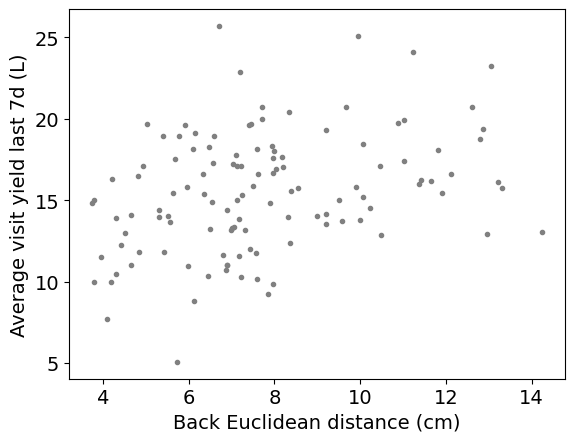

In [162]:
fdf = pd.read_csv(os.path.join(data_path, 'myield_integrated.csv'))
ddf = pd.read_csv(features_path)
merged = ddf.merge(fdf, on = "cow", how= "left")

v = "back_eu"
u = "vyield_udder_7d"
selected = merged[[v, u]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(selected[v], selected[u], ".", color = "gray")
plt.xlabel("Back Euclidean distance (cm)")
plt.ylabel("Average visit yield last 7d (L)")
plt.savefig(os.path.join(plot_dir, v+"_vs_"+ u+".png"))
print(res)

In [93]:
dirpath = os.getcwd()
vms_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),"delpro_vms")
vms_df = pd.read_csv(os.path.join(vms_dir, "milk_videos_filtered.csv"))
merged = ddf.merge(vms_df, on ="cow", how= "left")

In [100]:
from operator import mul

def time_tomin(my_time):
    factors = (60, 1, 1/60)
    t1 = sum(i*j for i, j in zip(map(int, my_time.split(':')), factors))
    t2 = sum(map(mul, map(int, my_time.split(':')), factors))
    return t2

In [109]:
i = 1
time_tomin(selected.loc[i, u])

523.05

In [112]:
selecte

range(0, 132)

PearsonRResult(statistic=0.24335059276669657, pvalue=0.005641412156026013)


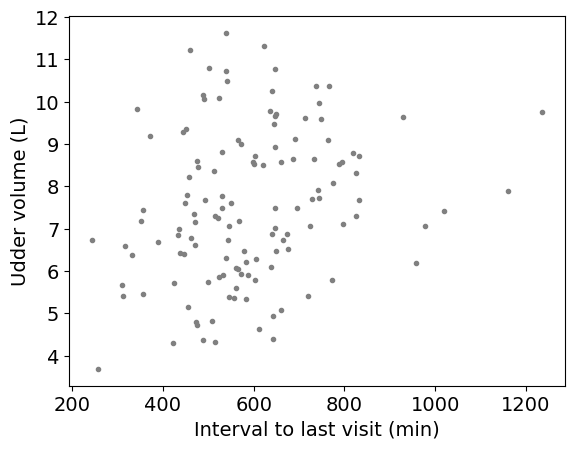

In [159]:
v = "udder_vol"
u = "interval"
z = "lactation_number"
selected = merged[[v, u, z]].dropna(axis=0).reset_index()
selected[u] = [time_tomin(selected.loc[i, u]) for i in range(len(selected))] 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(selected[u], selected[v],".", color = "gray")
plt.ylabel("Udder volume (L)")
plt.xlabel("Interval to last visit (min)")
plt.savefig(os.path.join(plot_dir, v+"_vs_"+ u+".png"))
print(res)

In [129]:
merged.columns

Index(['cow', 'udder_vol', 'lf_vol', 'rf_vol', 'lb_vol', 'rb_vol',
       'udder_sarea', 'lf_sarea', 'rf_sarea', 'lb_sarea', 'rb_sarea',
       'lf_angle', 'rf_angle', 'lb_angle', 'rb_angle', 'front_eu', 'back_eu',
       'right_eu', 'left_eu', 'front_gd', 'back_gd', 'right_gd', 'left_gd',
       'udder_peri', 'udder_area', 'udder_circ', 'udder_exc', 'lf_peri',
       'lf_area', 'lf_circ', 'lf_exc', 'rf_peri', 'rf_area', 'rf_circ',
       'rf_exc', 'lb_peri', 'lb_area', 'lb_circ', 'lb_exc', 'rb_peri',
       'rb_area', 'rb_circ', 'rb_exc', 'lf_len', 'rf_len', 'lb_len', 'rb_len',
       'farmname', 'robotside', 'filename', 'directory', 'date', 'time',
       'size', 'computer', 'begin_time', 'end_time', 'yield', 'device_name',
       'conductivity_lf', 'conductivity_lr', 'conductivity_rf',
       'conductivity_rr', 'mean_flow_lf', 'mean_flow_lr', 'mean_flow_rf',
       'mean_flow_rr', 'yield_lf', 'yield_lr', 'yield_rf', 'yield_rr',
       'occ(*1000_cells/ml)', 'peak_flow_lf', 'peak_flo

PearsonRResult(statistic=0.38056415267463584, pvalue=7.953357142982856e-06)


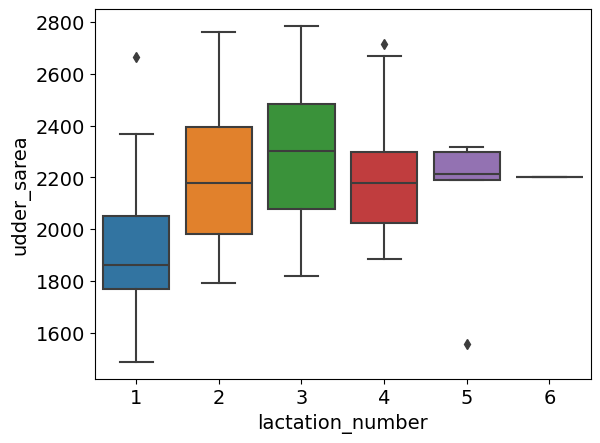

In [151]:
u = "udder_sarea"
v = "lactation_number"
selected = merged[[v, u ]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
sns.boxplot(x = selected[v], y = selected[u])
print(res)

PearsonRResult(statistic=0.4483180884897785, pvalue=1.2528356824704467e-07)


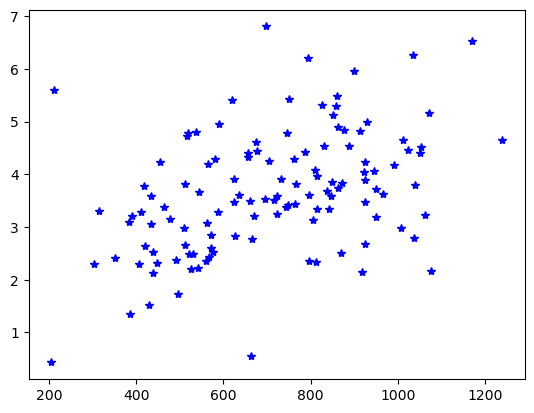

In [29]:
v = "udder_sarea"
u = "vyield_udder_7d"
selected = merged[[v, u ]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(x,y, "*b")
print(res)

In [37]:
dirpath = os.getcwd()
vms_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),"delpro_vms")
vms_df = pd.read_csv(os.path.join(vms_dir, "milk_videos_filtered.csv"))
merged = ddf.merge(vms_df, on ="cow", how= "left")

PearsonRResult(statistic=0.4130883475926361, pvalue=7.723219396997628e-05)


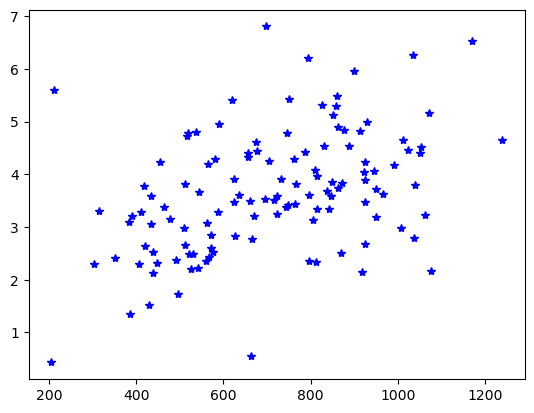

In [40]:

v = "udder_sarea"
u = "peak_yield"
selected = merged[[v, u ]].dropna(axis=0) 
res = stats.pearsonr(selected[v], selected[u])
plt.plot(x,y, "*b")
print(res)

In [39]:
merged.columns

Index(['cow', 'udder_vol', 'lf_vol', 'rf_vol', 'lb_vol', 'rb_vol',
       'udder_sarea', 'lf_sarea', 'rf_sarea', 'lb_sarea', 'rb_sarea',
       'lf_angle', 'rf_angle', 'lb_angle', 'rb_angle', 'front_eu', 'back_eu',
       'right_eu', 'left_eu', 'front_gd', 'back_gd', 'right_gd', 'left_gd',
       'udder_peri', 'udder_area', 'udder_circ', 'udder_exc', 'lf_peri',
       'lf_area', 'lf_circ', 'lf_exc', 'rf_peri', 'rf_area', 'rf_circ',
       'rf_exc', 'lb_peri', 'lb_area', 'lb_circ', 'lb_exc', 'rb_peri',
       'rb_area', 'rb_circ', 'rb_exc', 'lf_len', 'rf_len', 'lb_len', 'rb_len',
       'farmname', 'robotside', 'filename', 'directory', 'date', 'time',
       'size', 'computer', 'begin_time', 'end_time', 'yield', 'device_name',
       'conductivity_lf', 'conductivity_lr', 'conductivity_rf',
       'conductivity_rr', 'mean_flow_lf', 'mean_flow_lr', 'mean_flow_rf',
       'mean_flow_rr', 'yield_lf', 'yield_lr', 'yield_rf', 'yield_rr',
       'occ(*1000_cells/ml)', 'peak_flow_lf', 'peak_flo